# TFS - Task2 - To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon thenumber of hours they studied.This is a simple linear regression task as it involves just two variables.


Data can be be found at http://bit.ly/w-data


What will be predicted score if a student study for 9.25 hrs in a day?

In [1]:
# Import all Required Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading the data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df_data = pd.read_csv(url)
print("Data Read Successfully from given URL")


df_data.head(10)

Data Read Successfully from given URL


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

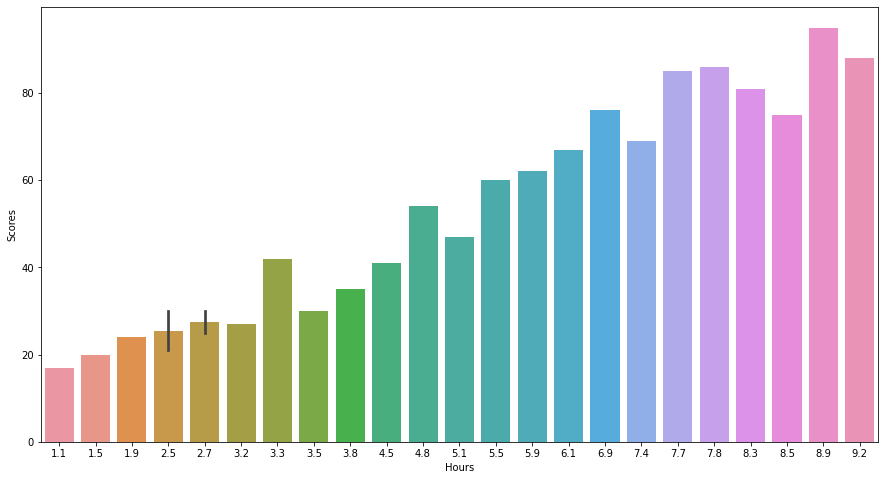

In [3]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_data['Hours'],y=df_data['Scores'])

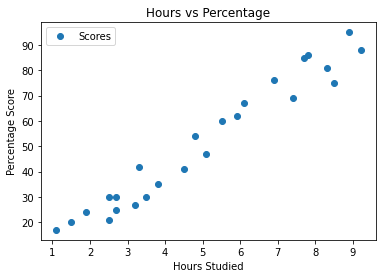

In [4]:
# Plotting the distribution of Scores
df_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


# Data Preparation

In [5]:
x = df_data.iloc[:, : -1].values
y = df_data.iloc[:, 1].values

In [6]:
# Splitting the data
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

In [7]:
# Training the algorithm
from sklearn.linear_model import LinearRegression
regrassor = LinearRegression()
regrassor.fit(x_train , y_train)

print("Training is Completed")

Training is Completed


In [8]:
# Plotting the regression line
line = regrassor.coef_*x+regrassor.intercept_

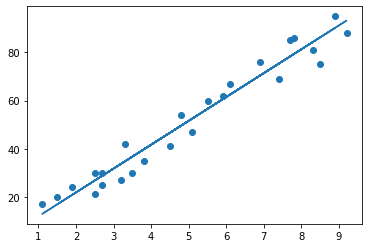

In [9]:
# Plotting the test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

# Making the Predection

In [10]:
# Testing data in Hours
print(x_test)

# Predecting the scores
y_pred = regrassor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs. Pedicted
df = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


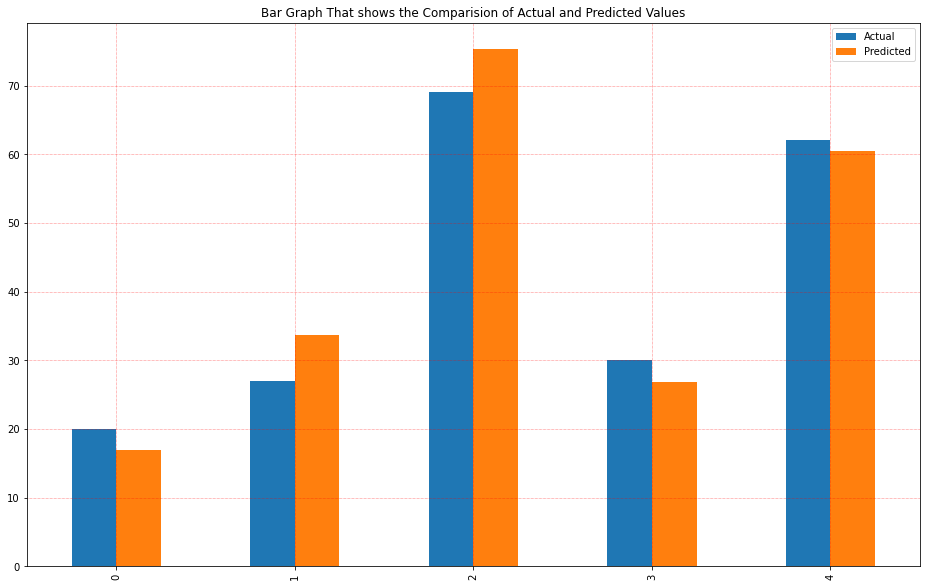

In [12]:
df1 = df
df.plot(kind = 'bar' , figsize = (16,10))
plt.title("Bar Graph That shows the Comparision of Actual and Predicted Values")
plt.grid(which='major',linestyle=':',linewidth='0.5',color='Red')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='Black')
plt.show()


In [13]:
print(x_train.shape)
print(x_test.shape)

(20, 1)
(5, 1)


# Evaluating the model

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
